# Matek Stat alapozás

Ez a notebook Python és R kódot fog tartalmazni, és demonstrálni fogja a következő témákat:
1. Logaritmus és Exponenciális függvény
2. Eloszlásfüggvvény, sűrűségfüggvény
3. Momentumok: Várható érték, szórás, ferdeség csúcsosság
4. Nevezetes eloszlások

  1. Bernoulli
  2. Binomiális eloszlás
  3. Poisson eloszlás
  4. Hatványeloszlás
  5. Exponenciális eloszlás
  6. Normális eloszlás
  
5. Centrális határeloszlás tétel
7. Harmonikus sorok

Megtanulunk rajzolni, táblákkal bánni illetvve a legfontosabb R és Python függvényeket. Ezeket a dolgokat minden magára valamit is adó társadalomtudósnak készség szinten kell tudnia.

## Logaritmus és exponenciális függvény

In [4]:
# Szentháromság:
import pandas as pd  # standard táblázatkezelő csomag
import numpy as np  # matek függvények,  igazából ez fut a pandas mögött
import matplotlib.pyplot as plt  # Rajzoló csomag

# Az esetek 99%ban minden python kód így fog kezdődni
# Ezen felül még hasznos lehet
import seaborn as sns  # a rövidítések a végén konvenciók, mást is lehet használni, ami csak tetszik

### Exponenciális függvény

Minden ilyen alakú függvény exponenciális:

${\displaystyle f(x)=ab^{x},}$

Exponenciális  függvény azonosságok:

${\displaystyle ab^{cx+d}=\left(ab^{d}\right)\left(b^{c}\right)^{x}.}$

Deriváltja:

${\displaystyle {\frac {d}{dx}}b^{x}=b^{x}\log _{e}b.}$

Integráltja:

${\displaystyle \int f'(x)e^{f(x)}\,dx=e^{f(x)}}$

Gyártsuk le ezeket az összefüggéseket!

In [5]:
# először is egy x-tengely
x = np.linspace(-10, 10, 200, False)
# expo függvény
exp_x = np.exp(x)
exp_2_x = np.exp2(x)
# a numpy-al előállított vektorokat betesszük egy pandas DataFrambe
exp_df = pd.DataFrame(index=x, columns=["exp_x", "exp_2_x", "diff_exp_x", "int_exp_x"])
exp_df["exp_x"] = exp_x
exp_df["exp_2_x"] = exp_2_x

exp_df.head(8)

,exp_x,exp_2_x,diff_exp_x,int_exp_x
-10.0,0.000045,0.000977,NaN,NaN
-9.9,0.000050,0.001047,NaN,NaN
-9.8,0.000055,0.001122,NaN,NaN
-9.7,0.000061,0.001202,NaN,NaN
-9.6,0.000068,0.001289,NaN,NaN
-9.5,0.000075,0.001381,NaN,NaN
-9.4,0.000083,0.001480,NaN,NaN
-9.3,0.000091,0.001586,NaN,NaN


<img src="linspace.png">

<img src="pandas_df.png">

Text(0.5, 1.0, 'Exponential function on a VERY \n Negative spectrum')

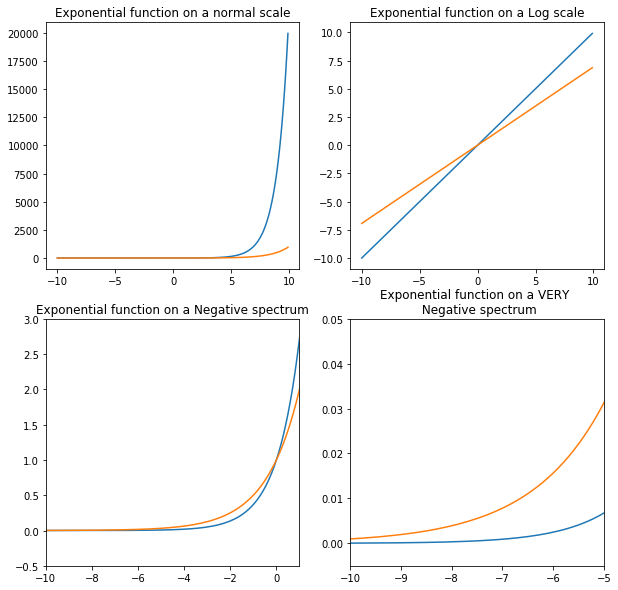

In [4]:
#Rajzoljunk!
#1. lépés: a vászon, ami egy 2x2es négyzetrács lesz:
fig,axes = plt.subplots(2,2,figsize=(10,10))
#az egyes subplotokat az axes objektumban indexeljük
axes[0,0].plot(exp_df["exp_x"])
axes[0,0].plot(exp_df["exp_2_x"])
#Címadás
axes[0,0].set_title("Exponential function on a normal scale")

axes[0,1].plot(np.log(exp_df["exp_x"]))
axes[0,1].plot(np.log(exp_df["exp_2_x"]))
axes[0,1].set_title("Exponential function on a Log scale")

axes[1,0].plot(exp_df["exp_x"])
axes[1,0].plot(exp_df["exp_2_x"])
axes[1,0].set_xlim(-10,1)
axes[1,0].set_ylim(-0.5,3)
axes[1,0].set_title("Exponential function on a Negative spectrum")

axes[1,1].plot(exp_df["exp_x"])
axes[1,1].plot(exp_df["exp_2_x"])
axes[1,1].set_xlim(-10,-5)
axes[1,1].set_ylim(-0.005,0.05)
axes[1,1].set_title("Exponential function on a VERY \n Negative spectrum")

**Közönségkérdések**

Értelmezési tartomány?

Értékkészlet?

Határérték +/- végtelen?
$$\lim_{x\to\infty} \frac{a^x}{b^x}=??$$

### Integrál és derivált

Az exponenciális függvény speciális tulajdonsága, hogy invariáns deriválás és integrálás műveletekre. Sőt mi több, igazából EZ az exponenciális függvény definíciója,  minden  más csupán ennek következménye

<img src="exp_diff.jpg">

Mi a derivált tullajdonképpen? A függvény megváltozása!

$$m={\frac {{\text{change in }}y}{{\text{change in }}x}}={\frac {\Delta y}{\Delta x}}$$

$$f'(a)=\lim _{h\to 0}{\frac {f(a+h)-f(a)}{h}}$$

In [5]:
#egy pd.Series .diff() methodjával állítjuk elő a különbségvektort
exp_df["diff_exp_x"]=exp_df["exp_x"].diff()/0.1
exp_df.head()

,exp_x,exp_2_x,diff_exp_x,int_exp_x
-10.0,0.000045,0.000977,NaN,NaN
-9.9,0.000050,0.001047,0.000048,NaN
-9.8,0.000055,0.001122,0.000053,NaN
-9.7,0.000061,0.001202,0.000058,NaN
-9.6,0.000068,0.001289,0.000064,NaN


Text(0.5, 1.0, 'Exponential function on a VERY \n Negative spectrum')

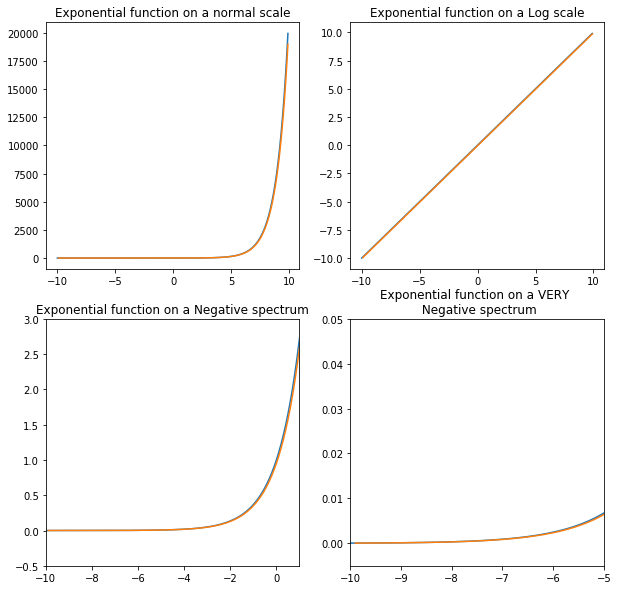

In [6]:
#ábrázoljuk a deriváltat ás az eredeti függvényt, egybeesik a 2 vonal
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].plot(exp_df["exp_x"])
axes[0,0].plot(exp_df["diff_exp_x"])
axes[0,0].set_title("Exponential function on a normal scale")

axes[0,1].plot(np.log(exp_df["exp_x"]))
axes[0,1].plot(np.log(exp_df["diff_exp_x"]))
axes[0,1].set_title("Exponential function on a Log scale")

axes[1,0].plot(exp_df["exp_x"])
axes[1,0].plot(exp_df["diff_exp_x"])
axes[1,0].set_xlim(-10,1)
axes[1,0].set_ylim(-0.5,3)
axes[1,0].set_title("Exponential function on a Negative spectrum")

axes[1,1].plot(exp_df["exp_x"])
axes[1,1].plot(exp_df["diff_exp_x"])
axes[1,1].set_xlim(-10,-5)
axes[1,1].set_ylim(-0.005,0.05)
axes[1,1].set_title("Exponential function on a VERY \n Negative spectrum")

Ajánlott olvasmány:
https://www.quora.com/q/bzxvjykyriufyfio/What-is-math-pi-math-and-while-were-at-it-whats-math-e-math

### Integrál

Egy függvény integrálja a függvény alatti terület


<img src="Integral_approximations.svg">

In [7]:
#pontosan a fenti ábrát fogom leprogramozni
exp_df["int_exp_x_bottom"]=exp_df["exp_x"]*0.1
#a shift eggyel felfelé tolja az egész vektort
exp_df["int_exp_x_top"]=exp_df["exp_x"].shift(-1)*0.1
exp_df["int_exp_x"]=(exp_df["int_exp_x_bottom"]+exp_df["int_exp_x_top"])/2
#cumsum cumulative sum-ot jelent
exp_df["int_exp_x"]=exp_df["int_exp_x"].cumsum()
exp_df.head()

,exp_x,exp_2_x,diff_exp_x,int_exp_x,int_exp_x_bottom,int_exp_x_top
-10.0,0.000045,0.000977,NaN,0.000005,0.000005,0.000005
-9.9,0.000050,0.001047,0.000048,0.000010,0.000005,0.000006
-9.8,0.000055,0.001122,0.000053,0.000016,0.000006,0.000006
-9.7,0.000061,0.001202,0.000058,0.000022,0.000006,0.000007
-9.6,0.000068,0.001289,0.000064,0.000029,0.000007,0.000007


Text(0.5, 1.0, 'Exponential function on a VERY \n Negative spectrum')

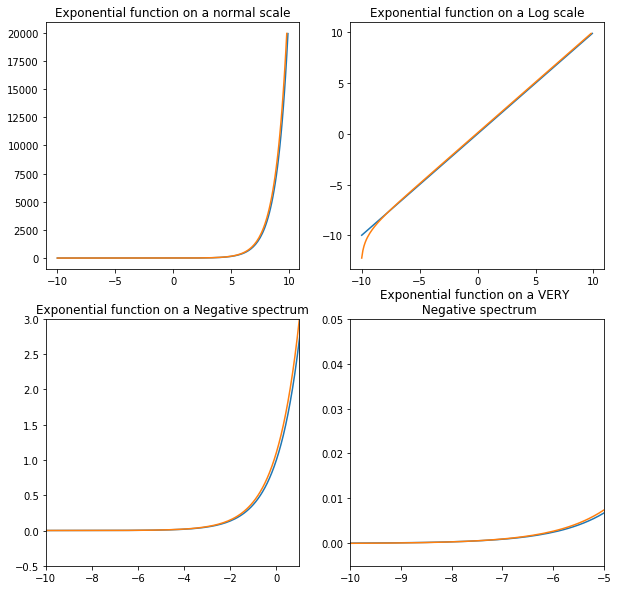

In [8]:
#ezt is lerajzolom, itt is látszik az invariancia
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].plot(exp_df["exp_x"])
axes[0,0].plot(exp_df["int_exp_x"])
axes[0,0].set_title("Exponential function on a normal scale")

axes[0,1].plot(np.log(exp_df["exp_x"]))
axes[0,1].plot(np.log(exp_df["int_exp_x"]))
axes[0,1].set_title("Exponential function on a Log scale")

axes[1,0].plot(exp_df["exp_x"])
axes[1,0].plot(exp_df["int_exp_x"])
axes[1,0].set_xlim(-10,1)
axes[1,0].set_ylim(-0.5,3)
axes[1,0].set_title("Exponential function on a Negative spectrum")

axes[1,1].plot(exp_df["exp_x"])
axes[1,1].plot(exp_df["int_exp_x"])
axes[1,1].set_xlim(-10,-5)
axes[1,1].set_ylim(-0.005,0.05)
axes[1,1].set_title("Exponential function on a VERY \n Negative spectrum")

## Logaritmus függvény

A logaritmus függvény az exponenciális függvény inverze. 

$$f^{-1}\left(\,f(x)\,\right)=x$$
Az inverz függvényekre általánosságban igaz, hogy helyet cseréls az értelmezési tartomány és az értékkészlet, illetve hogy a két függvény egymás tükörképe a $x=y$ egyenesre.

In [9]:
exp_df["log_x"]=np.log(exp_df.index)
exp_df["x"]=exp_df.index

exp_df.head()

C:\Users\Akarpati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Akarpati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,exp_x,exp_2_x,diff_exp_x,int_exp_x,int_exp_x_bottom,int_exp_x_top,log_x,x
-10.0,0.000045,0.000977,NaN,0.000005,0.000005,0.000005,NaN,-10.0
-9.9,0.000050,0.001047,0.000048,0.000010,0.000005,0.000006,NaN,-9.9
-9.8,0.000055,0.001122,0.000053,0.000016,0.000006,0.000006,NaN,-9.8
-9.7,0.000061,0.001202,0.000058,0.000022,0.000006,0.000007,NaN,-9.7
-9.6,0.000068,0.001289,0.000064,0.000029,0.000007,0.000007,NaN,-9.6


Text(0.5, 1.0, 'Exponential and Logarithmic function on a normal scale')

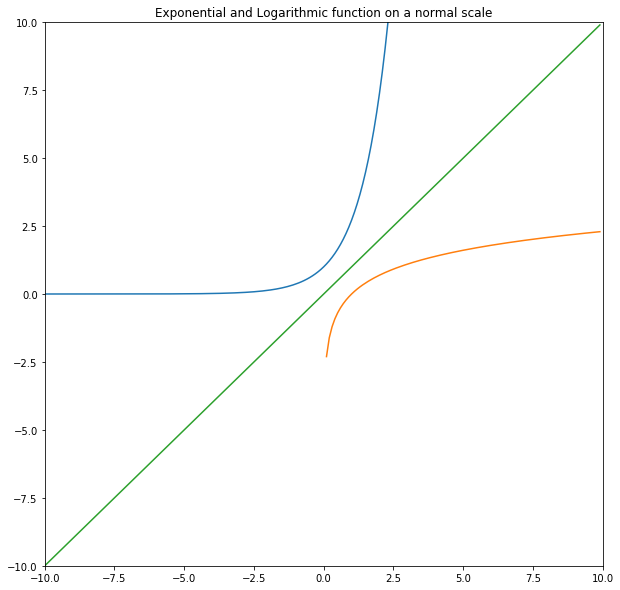

In [10]:
fig,axes = plt.subplots(1,1,figsize=(10,10))
axes.plot(exp_df["exp_x"])
axes.plot(exp_df["log_x"])
axes.plot(exp_df["x"])
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
#Ezt jelenti az inverz függvény
axes.set_title("Exponential and Logarithmic function on a normal scale")

Definíció:

$${\displaystyle \log _{b}(x)=y\quad } \text{exactly if} {\displaystyle \quad b^{y}=x.}$$

Logaritmus azonosságok:

$${\displaystyle \log _{b}(xy)=\log _{b}x+\log _{b}y,\,}$$

$${\displaystyle \log _{b}x={\frac {\log _{10}x}{\log _{10}b}}={\frac {\log _{e}x}{\log _{e}b}}.\,}$$

$${\displaystyle \log _{b}\left(b^{x}\right)=x\log _{b}b=x.}$$

Derivált:

$${\displaystyle {\frac {d}{dx}}\log _{b}x={\frac {1}{x\ln b}}.}$$

$${\displaystyle {\frac {d}{dx}}\ln f(x)={\frac {f'(x)}{f(x)}}.}$$

$$\ln(t)=\int _{1}^{t}{\frac {1}{x}}\,dx.$$

Integrál:

$$\int \ln(x)\,dx=x\ln(x)-x+C.$$


 A numpyban csak egyfajta logaritmus van beépítve :( A fenti azonosságok alapján gyártsuk le a kettes alapú logaritmust.


In [11]:
exp_df["log_2_x"]=exp_df["log_x"]/np.log(2)
exp_df.head()

,exp_x,exp_2_x,diff_exp_x,int_exp_x,int_exp_x_bottom,int_exp_x_top,log_x,x,log_2_x
-10.0,0.000045,0.000977,NaN,0.000005,0.000005,0.000005,NaN,-10.0,NaN
-9.9,0.000050,0.001047,0.000048,0.000010,0.000005,0.000006,NaN,-9.9,NaN
-9.8,0.000055,0.001122,0.000053,0.000016,0.000006,0.000006,NaN,-9.8,NaN
-9.7,0.000061,0.001202,0.000058,0.000022,0.000006,0.000007,NaN,-9.7,NaN
-9.6,0.000068,0.001289,0.000064,0.000029,0.000007,0.000007,NaN,-9.6,NaN


In [12]:
exp_df.loc[8]

exp_x               2980.957987
exp_2_x              256.000000
diff_exp_x          2836.756588
int_exp_x           3297.212962
int_exp_x_bottom     298.095799
int_exp_x_top        329.446808
log_x                  2.079442
x                      8.000000
log_2_x                3.000000
Name: 8.0, dtype: float64

**Közönségkérdések**

Értelmezési tartomány?

Értékkészlet?

Határérték +/- végtelen?
$$\lim_{x\to\infty} \frac{\log_2{x}}{\log_4{x}}=??$$

## Eloszlás és sűrűségfüggvény

Az eloszlásfüggvény az a függvény amelyik egyértelműen definiál egy valószínűségi változót. A valószínűségi változó olyan **függvény**, amelynek értéke egy véletlen eseménytől függ. 

Eloszlásfüggvény definíció: ${\displaystyle F_{X}(x)=\operatorname {P} (X\leq x)}$

Illetve: ${\displaystyle \operatorname {P} (a<X\leq b)=F_{X}(b)-F_{X}(a)}$

Ezen felül: $F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt.$

**Tulajdonságok**

${\displaystyle \lim _{x\to -\infty }F_{X}(x)=0,\quad \lim _{x\to +\infty }F_{X}(x)=1.}$

${\displaystyle F_{X}(b)-F_{X}(a)=\operatorname {P} (a<X\leq b)=\int _{a}^{b}f_{X}(x)\,dx}$

Ezek a definíciók a folytonos esetre vonatkoznak, diszkrét esetben az integrált szummával helyettesítjük



Gyártsunk le egy eloszlásfüggvényt! Legyen a mögöttes valószínűségi változó egyenletes illetve normális eloszlású

In [9]:
prob_df=pd.DataFrame()
prob_df["uni"]=np.random.uniform(0,1,10000)
prob_df["norm"]=np.random.normal(0,1,10000)


<img src="np_rand_uni.png">

<img src="np_rand_norm.png">

Megvannak a **realizációk** a két eloszlásból, most már csak ki kell számolni az eloszlásfüggvényeket. Ahhoz hogy fel tudjuk rajzolni az eloszlásfüggvényt, előbb érdemes megkonstruálni a sűrűségfüggvényt. A sűrűségfüggvény az eloszlásfüggvény deriváltja, az eloszlásfüggvény a sűrűségfüggvény integráltja

In [10]:
bins=np.linspace(-3,3,50)
#a cut folytonosból diszkrét változót csinál binninggel
prob_df["uni_binned"]=pd.cut(prob_df["uni"],bins=bins)
prob_df["norm_binned"]=pd.cut(prob_df["norm"],bins=bins)
prob_df.head()

,uni,norm,uni_binned,norm_binned
0,0.944009,-0.048582,"(0.918, 1.041]","(-0.0612, 0.0612]"
1,0.004758,0.392866,"(-0.0612, 0.0612]","(0.306, 0.429]"
2,0.500481,-0.105884,"(0.429, 0.551]","(-0.184, -0.0612]"
3,0.899431,0.300157,"(0.796, 0.918]","(0.184, 0.306]"
4,0.872948,0.051905,"(0.796, 0.918]","(-0.0612, 0.0612]"


<img src="pd_cut.png">

In [11]:
density_df=pd.DataFrame()
#előállítom a sűrűségfüggvényt mind2 eloszlásra
density_df["uni"]=prob_df["uni_binned"].value_counts(normalize=True).sort_index()
density_df["norm"]=prob_df["norm_binned"].value_counts(normalize=True).sort_index()
density_df=density_df.reset_index()
#intervallum szélek
density_df["left"]=density_df["index"].apply(lambda x: x.left)
density_df["right"]=density_df["index"].apply(lambda x: x.right)
density_df["center"]=density_df[["left","right"]].mean(axis=1)
density_df=density_df.set_index("center")

#kiszámoljuk a kumulatív függvényt
density_df["uni_cum"]=density_df["uni"].cumsum()
#pun intended
density_df["norm_cum"]=density_df["norm"].cumsum()

density_df.head()

,index,uni,norm,left,right,uni_cum,norm_cum
center,,,,,,,
-2.9390,"(-3.0, -2.878]",0.0,0.000903,-3.000,-2.878,0.0,0.000903
-2.8165,"(-2.878, -2.755]",0.0,0.000602,-2.878,-2.755,0.0,0.001505
-2.6940,"(-2.755, -2.633]",0.0,0.001605,-2.755,-2.633,0.0,0.003110
-2.5715,"(-2.633, -2.51]",0.0,0.001605,-2.633,-2.510,0.0,0.004715
-2.4490,"(-2.51, -2.388]",0.0,0.002608,-2.510,-2.388,0.0,0.007323


<img src="pd_vc.png">

Text(0.5, 1.0, 'Normal distribution cumulative')

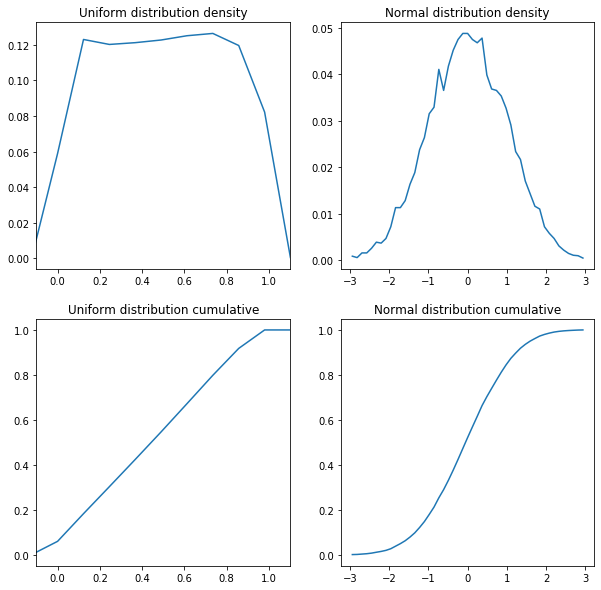

In [12]:
plt.close("all")
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0,0].plot(density_df["uni"])
axes[0,0].set_xlim(-0.1,1.1)
axes[0,0].set_title("Uniform distribution density")

axes[0,1].plot(density_df["norm"])
axes[0,1].set_title("Normal distribution density")

axes[1,0].plot(density_df["uni_cum"])
axes[1,0].set_xlim(-0.1,1.1)
axes[1,0].set_title("Uniform distribution cumulative")


axes[1,1].plot(density_df["norm_cum"])
axes[1,1].set_title("Normal distribution cumulative")


## Momentumok

Egy tetszőleges eloszlás n-edik momentumait a következőképpen számolhatjuk ki:
    
$${\displaystyle \mu '_{n}=\operatorname {E} \left[X^{n}\right]=\int _{-\infty }^{\infty }x^{n}\,\mathrm {d} F(x)\,}=\int _{-\infty }^{\infty }x^{n}f(x)\,\mathrm {d} x\,$$

Azaz $x^n$ szorozva a sűrűségfüggvénnyel leintegrálva $x$ szerint az értelmezési tartományon, avagy $X^n$ várható értéke.

Figyelem! Ez az integrál nem feltétlenül konvergens!

**Nevezetes momentumok**

**Várható érték:** 

$$\operatorname {E} \left[X\right]=\int _{-\infty }^{\infty }x f(x)\,\mathrm {d} x\,$$

**Szórás:**

$${\displaystyle \sigma (X)={\sqrt {\operatorname {E} [(X-\operatorname {E} [X])^{2}]}}={\sqrt {\operatorname {E} [X^{2}]-(\operatorname {E} [X])^{2}}}.}$$

A négyzet várható értéke mínusz a várható érték négyzete!

A négyzet várható értéke pedig:

$$\operatorname {E} \left[X^2\right]=\int _{-\infty }^{\infty }x^2 f(x)\,\mathrm {d} x\,$$

**Ferdeség** (Skewness): a harmadik momentumból számítható ki, ha negatív, akkor **bal** oldalon az eloszlás "farka" és vica versa

**Csúcsosság** (Kurtosis): Más szóval farkasság (ezeket nem én találtam ki...), a negyedik momentumból számítható ki. A normális eloszlás kurtózisa 3, ennél kisebb értékek esetén lapos, vastag farkú eloszlásokról beszélhetünk, 3-nál nagyobb értékek esetén csúcsos eloszlásokról

<img src="datasaurus_1.png">

<img src="datasaurus_2.png">

Takeaway: Sosem szabad megbízni csak a leíró statisztikákban, **mindig** kell ábrákat csinálni.

Nézzük meg a momentumait a legyártott valószínűségi változóinknak!

In [16]:
#identation
for var in["uni","norm"]:
    print("FOR VAR {} :".format(var))
    print("MEAN: {0:.2f}".format(prob_df[var].mean()))
    print("STANDARD DEVIATION: {0:.2f}".format(prob_df[var].std()))
    print("SKEWNESS: {0:.2f}".format(prob_df[var].skew()))
    print("KURTOSIS: {0:.2f}".format(prob_df[var].kurtosis()))

print("HELLO")

FOR VAR uni :
MEAN: 0.5020288201932088
STANDARD DEVIATION: 0.29
SKEWNESS: -0.01
KURTOSIS: -1.19
FOR VAR norm :
MEAN: 0.006088706686920775
STANDARD DEVIATION: 1.01
SKEWNESS: -0.04
KURTOSIS: -0.04
HELLO


<img src="pd_kurtosis.png">

It is also common practice to use an adjusted version of Pearson's kurtosis, the excess kurtosis, which is the kurtosis minus 3, to provide the comparison to the normal distribution. Some authors use "kurtosis" by itself to refer to the excess kurtosis. For the reason of clarity and generality, however, this article follows the non-excess convention and explicitly indicates where excess kurtosis is meant. (Wikipedia)

## Nevezetes eloszlások

Ezeket ismerni kell, hogy megértsük a tankönyvet. Nem kell fejből tudni a várható értéket és társait, de érteni kell hogy ezek mit modelleznek, és hogy milyen tulajdonságaik vannak.

### Bernoulli eloszlás

Az érmedobálást modellezi, lehetséges kimenetelei 1 vagy 0.
<img src="coin.png">

In [23]:
prob_df=pd.DataFrame()
np.random.seed(2)
prob_df["bern_2"]=np.random.binomial(1,0.5,10000)
prob_df["bern_10"]=np.random.binomial(1,0.1,10000)

#ha n=1, akkor bernoulli eloszlást kapok
print(prob_df["bern_2"].value_counts().sort_index())
print(prob_df["bern_10"].value_counts().sort_index())

0    5132
1    4868
Name: bern_2, dtype: int64
0    8999
1    1001
Name: bern_10, dtype: int64


<img src="np_binom.png">

<img src="bern_wiki.png">

### Binomiális eloszlás

Ha $n$-szer rúghatsz kapura, és $p$ valószínűséggel rúgod be, akkor hányszor lősz gólt? Közismertebb nevén visszatevéses mintavétel. Bernoulli eloszlású valószínűségi változók összege.

$${\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$$
<img src="bin_football.png">

In [25]:
prob_df["binom_10_2"]=np.random.binomial(10,0.5,10000)
prob_df["binom_10_10"]=np.random.binomial(10,0.1,10000)

#ha n=1, akkor bernoulli eloszlást kapok
print(prob_df["binom_10_2"].value_counts().sort_index())
print(prob_df["binom_10_10"].value_counts().sort_index())

0       10
1       96
2      476
3     1141
4     2010
5     2459
6     2108
7     1136
8      454
9       96
10      14
Name: binom_10_2, dtype: int64
0    3532
1    3868
2    1897
3     564
4     121
5      18
Name: binom_10_10, dtype: int64


Text(0.5, 1.0, 'BIN(10,0.1)')

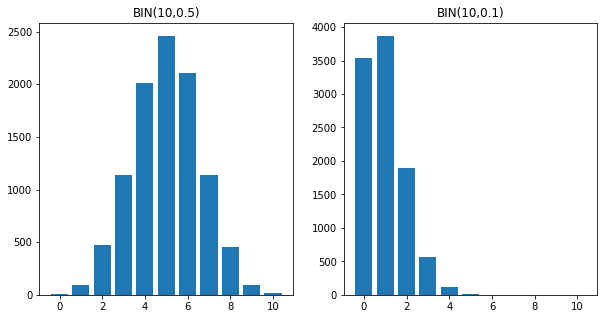

In [26]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].bar(x=np.arange(11),
            height=prob_df["binom_10_2"].value_counts().sort_index())
axes[0].set_title("BIN(10,0.5)")
axes[1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_10_10"].value_counts().sort_index()).fillna(0))
axes[1].set_title("BIN(10,0.1)")


Várható érték: $np$

Szórás: $np(1-p)$

**Közönségkérdés**: Melyiknek nagyobb a szórása?

## Poisson eloszlás

Kifejezi, hogy egy esemény hányszor következik be adott időintervallum alatt, amennyiben az esemény bekövetkezése konstans gyakoriságú és az egymást követő események függetlenek egymástól. A legjobb példa erre hogy háány emailt kapsz naponta / óránként.

$${\displaystyle P(k{\text{ events in interval}})={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$$

A Poisson-eloszlás a binomiális eloszlás határeloszlása ha $n$ tart a végtelenbe.

<img src="poi_mail.png">

Generáljunk Poisson eloszlást és demonstráljuk a határeloszlás tulajdonságot

<img src="np_poi.png">


A Poisson eloszlás várható értéke és **varianciája** is $\lambda$

In [28]:
prob_df["poi_1"]=np.random.poisson(1,10000)
prob_df["poi_5"]=np.random.poisson(5,10000)


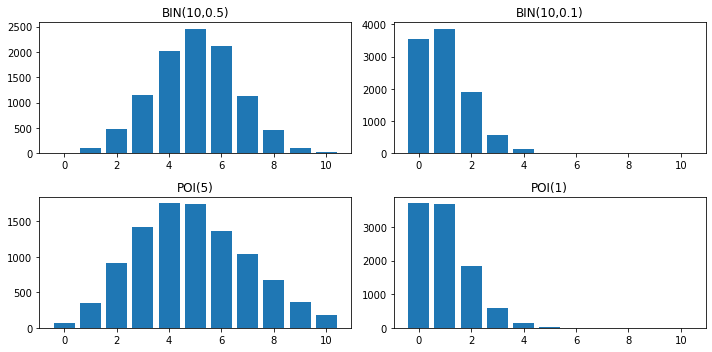

In [30]:
fig,axes=plt.subplots(2,2,figsize=(10,5))
axes[0,0].bar(x=np.arange(11),height=prob_df["binom_10_2"].value_counts().sort_index())
axes[0,0].set_title("BIN(10,0.5)")
axes[0,1].bar(x=np.arange(11),
              height=pd.Series(index=np.arange(11),
                data=prob_df["binom_10_10"].value_counts().sort_index()).fillna(0))
axes[0,1].set_title("BIN(10,0.1)")

axes[1,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_5"].value_counts().sort_index()).fillna(0))
axes[1,0].set_title("POI(5)")

axes[1,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_1"].value_counts().sort_index()).fillna(0))
axes[1,1].set_title("POI(1)")
plt.tight_layout()
#nem  teljesen ugyanaz!

# Házi feladat

Ábrázoljátok $n$ függvényében különböző paraméterű, de azonos várható értékű Poisson eloszlású és Binomiális eloszlású valúszínűségi változók közötti különbséget! Kisebb vagy nagyobb lambda esetén gyorsabb a konvergencia? A konvergencia mértéke legyen a sűrűségfüggvények közötti abszolút eltérés maximuma!

A trükk hogy $np=\lambda$ minden esetben.

### Hatványeloszlás (Power law)

Olyan jelenséget ír le, melyben két változó összefüggésében az egyik változó arányos megváltozása a másik változó arányos megváltozásához vezet. Pl ha egy négyzet oldalhosszát 2-szeresére változtatjuk, akkor a négyzet területe 4-szeresére nő, ha az oldalhossz 3-szorosára nő akkor a négyzet térfogata 9-szeresére nő. 

$$Y=kX^\alpha$$

$${\displaystyle P(X<x)\sim x^{\alpha}}$$

Tipikus esetei: Földrengések erőssége, Jövedelemeloszlás, szavak gyakorisága egy szövegben.

$$p(x) = \frac{\alpha-1}{x_\min} \left(\frac{x}{x_\min}\right)^{-\alpha}$$

<img src="np_power.png">

Nem ugyanaz a két definíció, mi a wikipédiásat használjuk mert a Barabási könyv is azt használja. Sajnos ez a beépített függvény itt nem működik, egy másik packare van szükség.

<img src="pl_pl.png">


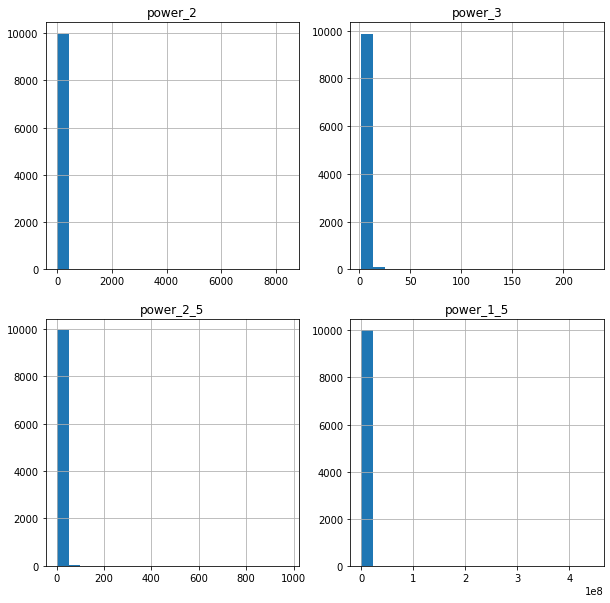

In [31]:
import powerlaw as powerlaw
#próbáljuk meg ezt lerajzolni hisztogramon, ahogy az előbb
prob_df["power_2"]=powerlaw.Power_Law(xmin=2, parameters=[2],
                                      discrete=True).generate_random(10000)
prob_df["power_2_5"]=powerlaw.Power_Law(xmin=2, parameters=[2.5],discrete=True).generate_random(10000)
prob_df["power_3"]=powerlaw.Power_Law(xmin=2, parameters=[3],discrete=True).generate_random(10000)
prob_df["power_1_5"]=powerlaw.Power_Law(xmin=2, parameters=[1.5],discrete=True).generate_random(10000)
fig,axes=plt.subplots(2,2,figsize=(10,10))
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    prob_df[pl].hist(bins=20,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    if row==1:
        col+=1
        row=0
    else:
        row+=1
#prob_df.head()
#fit = powerlaw.Fit(simulated_data)
#fit.power_law.xmin, fit.power_law.alpha

Szóval ez így histogramon ábbrázolva nem jó, mivel túl nagyon az értékkülönbségek. Hatványeloszlást log-log ploton lehet jól ábrázolni!


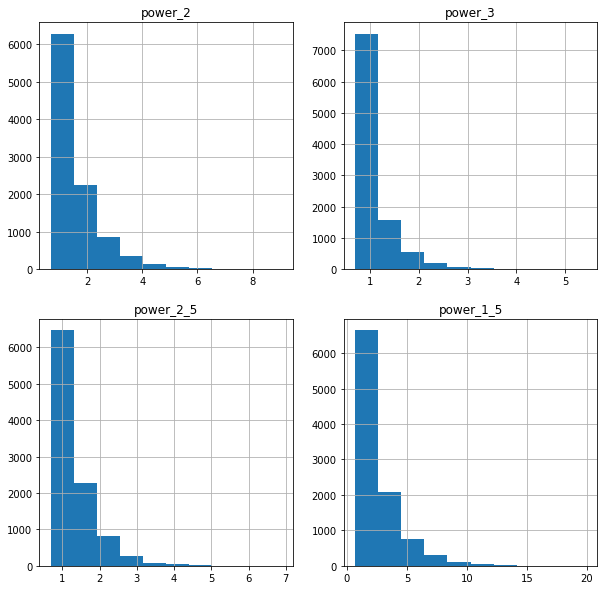

In [32]:
#először csak az x-tengelyt logaritmizáljuk
fig,axes=plt.subplots(2,2,figsize=(10,10))
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    np.log(prob_df[pl]).hist(bins=10,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    #axes[row,col].set_yscale('log')

    if row==1:
        col+=1
        row=0
    else:
        row+=1


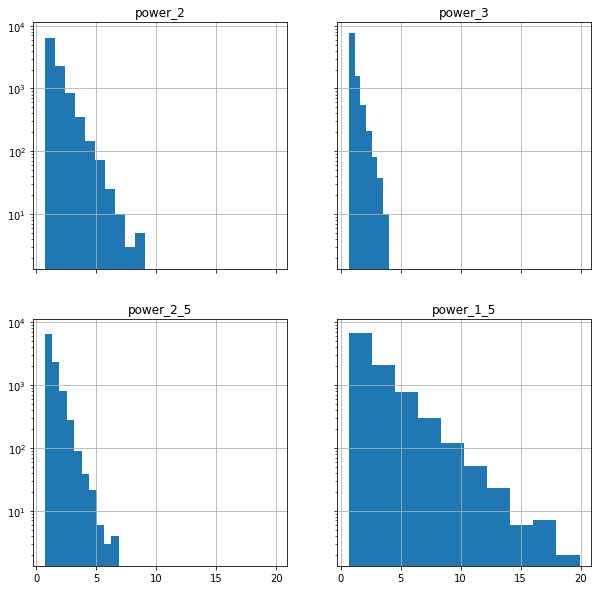

In [33]:
#aztán az y tengelyt is
fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    np.log(prob_df[pl]).hist(bins=10,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    axes[row,col].set_yscale('log')

    if row==1:
        col+=1
        row=0
    else:
        row+=1

#az összefüggés lineáris!

In [34]:
for pl in ["power_2","power_2_5","power_3","power_1_5"]:
    print(pl)
    print("MEAN : {0:.2f}".format(prob_df[pl].mean()))
    print("MEDIAN: {0:.2f}".format(prob_df[pl].median()))
    print("STDEV : {0:.2f}".format(prob_df[pl].std()))
    print(" ")

power_2
MEAN : 14.29
MEDIAN: 4.00
STDEV : 154.47
 
power_2_5
MEAN : 5.10
MEDIAN: 3.00
STDEV : 19.89
 
power_3
MEAN : 3.41
MEDIAN: 3.00
STDEV : 3.77
 
power_1_5
MEAN : 79090.97
MEDIAN: 6.00
STDEV : 4841589.18
 


## Házi feladat

Számoljátok ki pythonnal a normalizációs konstanst erre a 4 eloszlásra! Ez pont ugyanaz, mintha azt kérdezném hogy mekkora a hisztogramokon a kék terület!

Miért ilyen nagy az $\alpha=1.5$ paraméterrel rendelkező eloszlás várható értéke és szórása?

## Normális eloszlás

A normális eloszlás (Gaussian) minden statisztikai elemzés egyik legfontosabb része, minden más eloszlás "centrális határeloszlása", és a legtöbb valóságban megfigyelhető folyamatot ezzel írjuk le: magasság, IQ eloszlása a társadalomban, mérési hibák eloszlása, egy lineáris regresszió reziduumai stb...á

Sűsűségfüggvénye:

$${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

Eloszlásfüggvényét nem lehet zárt alakban felírni, a görög PHIvel jelöljük:

$${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$$

<img src="np_normal.png">


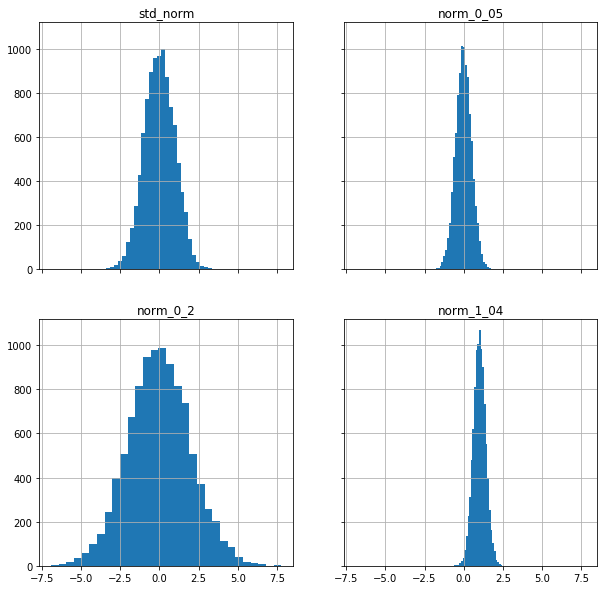

In [35]:
prob_df["std_norm"]=np.random.normal(0,1,10000)
prob_df["norm_0_2"]=np.random.normal(0,2,10000)
prob_df["norm_0_05"]=np.random.normal(0,0.5,10000)
prob_df["norm_1_04"]=np.random.normal(1,0.4,10000)
fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
row=0
col=0
for norm_dist in ["std_norm","norm_0_2","norm_0_05","norm_1_04"]:
    prob_df[norm_dist].hist(ax=axes[row,col],bins=30)
    axes[row,col].set_title(norm_dist)
    if row==1:
        col+=1
        row=0
    else:
        row+=1
    

Itt igazából nincs semmi látnivaló. A lényeg a centrális határeloszlás tétel!

## Centrális határeloszlás tétel

A centrális határeloszlás-tétel (CHT) azt mondja ki, hogy adott feltételek mellett, elegendően nagy számú és független valószínűségi változó középértéke (várható értéke) jó közelítéssel normális eloszlású, ha a független valószínűségi változók jól meghatározott középértékkel és szórásnégyzettel rendelkeznek.(Wiki)

Mintaátlag: $${\displaystyle S_{n}:={\frac {X_{1}+\cdots +X_{n}}{n}}}$$

Standardizálva: $${\displaystyle Z_{n}={\frac {S_{n}-n\mu }{\sigma {\sqrt {n}}}},}$$

Állítás: $${\displaystyle \lim _{n\to \infty }P(Z_{n}\leq z)=\Phi (z).}$$

Ennek bizonyítására generáljunk 100,1000,10000 realizációt különböző eloszlásokból, és nézzük meg hogyan viselkedik az összeg!



In [38]:
plot_df=clt_bern.sum(axis=0)
plot_df

0      487
1      493
2      500
3      502
4      526
      ... 
995    507
996    482
997    490
998    490
999    504
Length: 1000, dtype: int64

Text(0.5, 1.0, 'Poisson n=100')

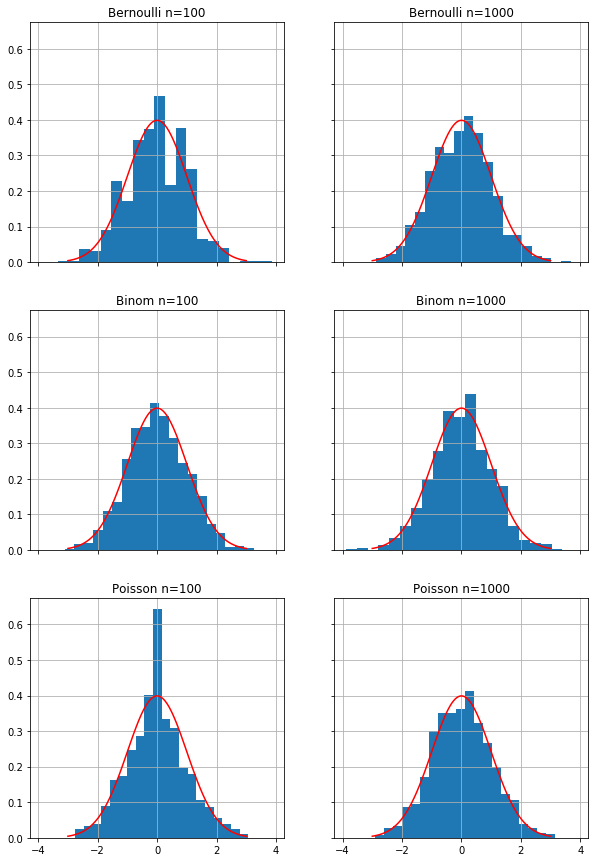

In [36]:
clt_bern=pd.DataFrame(data=np.random.binomial(n=1,p=0.5,size=(1000,1000)))
clt_binom=pd.DataFrame(data=np.random.binomial(n=100,p=0.5,size=(1000,1000)))
clt_poi=pd.DataFrame(data=np.random.poisson(lam=0.5,size=(1000,1000)))

fig,axes=plt.subplots(3,2,figsize=(10,15),sharex=True,sharey=True)

#normál eloszlás görbe
import math
import scipy.stats as stats

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
axes[0,1].plot(x, stats.norm.pdf(x, mu, sigma),c="r")
axes[1,1].plot(x, stats.norm.pdf(x, mu, sigma),c="r")
axes[0,0].plot(x, stats.norm.pdf(x, mu, sigma),c="r")
axes[1,0].plot(x, stats.norm.pdf(x, mu, sigma),c="r")
axes[2,0].plot(x, stats.norm.pdf(x, mu, sigma),c="r")
axes[2,1].plot(x, stats.norm.pdf(x, mu, sigma),c="r")


#összeadjuk az oszlopokat, így kapunk 1000 db független S_1000-et
plot_df=clt_bern.sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[0,1],bins=20,density=True)
axes[0,1].set_title("Bernoulli n=1000")
#csak az első 100 sor szummája, ez 1000 db független S_100
#(igen igen, ez így nem független, új realizációt kellene kérni de most jó lesz ez...)
plot_df=clt_bern.head(100).sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[0,0],bins=20,density=True)
axes[0,0].set_title("Bernoulli n=100")

#clt_bern.head()

#és ugyanz a másik két eloszlásra is
plot_df=clt_binom.sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[1,1],bins=20,density=True)
axes[1,1].set_title("Binom n=1000")

plot_df=clt_binom.head(100).sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[1,0],bins=20,density=True)
axes[1,0].set_title("Binom n=100")

plot_df=clt_poi.sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[2,1],bins=20,density=True)
axes[2,1].set_title("Poisson n=1000")

plot_df=clt_poi.head(100).sum(axis=0)
plot_df=(plot_df-plot_df.mean())/(plot_df.std())
plot_df.hist(ax=axes[2,0],bins=20,density=True)
axes[2,0].set_title("Poisson n=100")


## Harmonikus sor

$${\displaystyle \sum _{n=1}^{\infty }{\frac {1}{n}}=1+{\frac {1}{2}}+{\frac {1}{3}}+{\frac {1}{4}}+{\frac {1}{5}}+\cdots }$$

**Közönségkérdés**

Mi ennek az összege?

Számoljuk ki!

In [43]:
#h_s=[1/n for n  in np.arange(200)+1]
hs_df=pd.DataFrame(index=np.arange(200),columns=["HS_1","HS_2","HS_1_2","HS_3"])
hs_df["HS_1"]=[1/n for n  in np.arange(200)+1]
hs_df["HS_2"]=[1/(n*n) for n  in np.arange(200)+1]
hs_df["HS_1_2"]=[1/np.sqrt(n) for n  in np.arange(200)+1]
hs_df["HS_3"]=[1/(n*n*n) for n  in np.arange(200)+1]

for HS in ["HS_1","HS_2","HS_1_2","HS_3"]:
    hs_df[HS+"_CUMSUM"]=hs_df[HS].cumsum()
hs_df.head()

,HS_1,HS_2,HS_1_2,HS_3,HS_1_CUMSUM,HS_2_CUMSUM,HS_1_2_CUMSUM,HS_3_CUMSUM
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.500000,0.250000,0.707107,0.125000,1.500000,1.250000,1.707107,1.125000
2,0.333333,0.111111,0.577350,0.037037,1.833333,1.361111,2.284457,1.162037
3,0.250000,0.062500,0.500000,0.015625,2.083333,1.423611,2.784457,1.177662
4,0.200000,0.040000,0.447214,0.008000,2.283333,1.463611,3.231671,1.185662


Text(0.5, 1.0, 'HARMONIC SERIES (3) SUM')

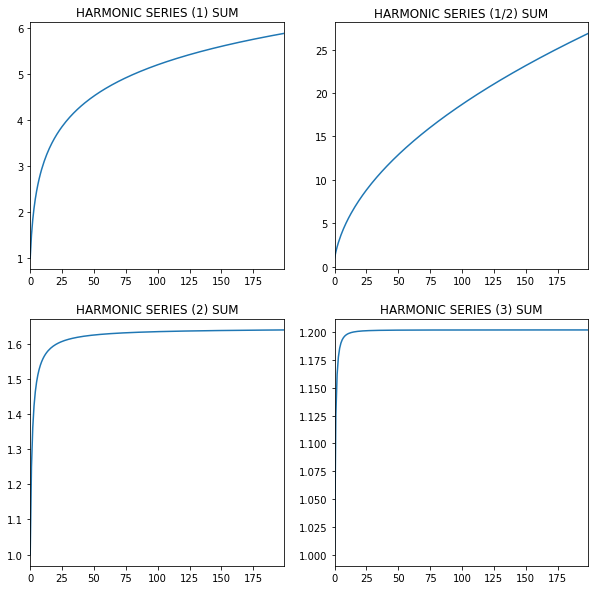

In [44]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

hs_df["HS_1_CUMSUM"].plot(ax=axes[0,0])
axes[0,0].set_title("HARMONIC SERIES (1) SUM")
hs_df["HS_1_2_CUMSUM"].plot(ax=axes[0,1])
axes[0,1].set_title("HARMONIC SERIES (1/2) SUM")

hs_df["HS_2_CUMSUM"].plot(ax=axes[1,0])
axes[1,0].set_title("HARMONIC SERIES (2) SUM")

hs_df["HS_3_CUMSUM"].plot(ax=axes[1,1])
axes[1,1].set_title("HARMONIC SERIES (3) SUM")


<img src="block_stacking.png">
